In [0]:
# Kullanılan kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Google Drive  ortamına bağlanma
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Anomali ve Anomali Tespiti Nedir?




Anomali tespiti, bir veri setinde verinin beklenen davranışına uymayan beklenmedik durumların veya kalıpların bulunması için kullanılan makine öğrenmesi algoritmasıdır. Temelde gözetimsiz(unsupervised) bir öğrenme türü olmasına rağmen eldeki probleme göre  gözetimli öğrenme türlerini andıran  bazı özellikleri de barındırabilir.






##Anomali Tespiti  Örnekleri 



*   Dolandırıcılık/Sahtekarlık tespiti 

*   Hatalı üretim tespiti 

*   Veri merkezlerindeki bilgisayarların çalışmasının kontrolü


 






# Algoritmanın Kurulması


Verilen bir veri kümesi için *anomali tespiti* yaparken **Normal Dağılım**dan ya da diğer adıyla **Gauss Dağılımı**ndan yararlanırız.

## Normal  Dağılım (Gauss Dağılımı) 


Bir verisetinin dağılımı bize verinin alabileceği değerler ve bu değerlerin hangi sıklıkla görüldüğü konusunda bilgi verir. 

Normal dağılım ya da Gauss dağılımı bir çok olguyu modelleyebilen ve bu yüzden de sıkça kullanılan bir olasılık dağılımıdır.

Normal dağılımıbelirleyen iki parametre bulunur


*   $\mu$ : ortalama
*   $\sigma^2$: varyans


Bir veri setinde verilerin genel olarak  ortalamaları etrafında simetrik bir şekilde dağıldığına  “normal dağılıma” sahip olduğunu gözleriz. Ortalamaya en yakın değerler görülme olasılığı (normal olma) olsılığı en yüksek değerlerken ortalamadan uzaklaştıkça ortaya çıkma ihtimalleri azalır. $\sigma^2$ verilerin ortalamadan ne kadar uzağa yayıldıklarıyla ilgili verir. 





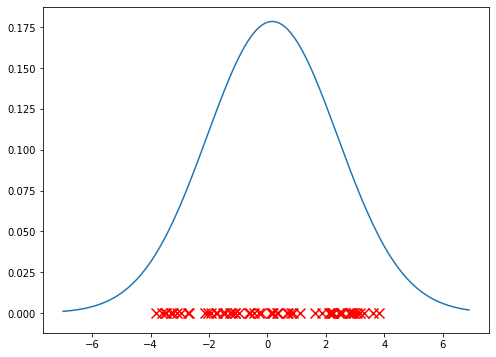

In [0]:
#@title Örnek: -4 ve 4 arasında rasgele seçilmiş sayıların dağılımı

def param(X):
  m =  X.shape[0]
  # ortalama 
  mu = 1/m * np.sum(X, axis=0)
  # varyans
  sigma2 = 1/m * np.sum(np.square(X-mu), axis=0)
  return mu, sigma2
  
def gaussian(x, mu, sigma2): 
  #gaussian = np.multiply(1/np.sqrt(2 * np.pi* sigma2), np.exp(-np.square(x-mu)/(2*sigma2))) #faster
  gaussian = 1/np.sqrt(2 * np.pi * sigma2)*np.exp(-np.square(x-mu)/(2*sigma2))
  return gaussian

x_rand = 8*np.random.rand(60,1)-4        # -4 ve 4 arasından rasgele 60 tane sayı seçer
mu_rand =  param(x_rand)[0]
sigma2_rand = param(x_rand)[1]

x_a = np.arange(-7,7,0.1)
y_a = gaussian(x_a, mu_rand, sigma2_rand)
plt.figure(figsize=(8, 6)) 
plt.plot(x_a, y_a)

plt.scatter(x_rand,np.zeros(len(x_rand)), marker = r'x', color ='red', s= 100, linewidths=3);


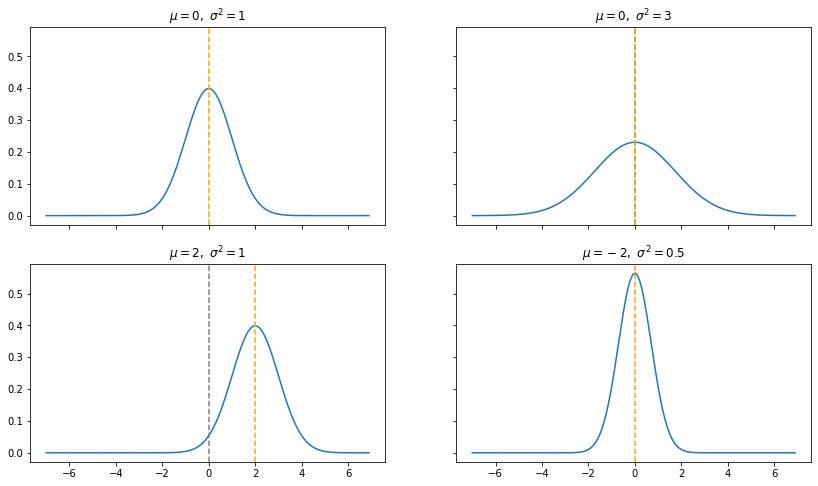

In [0]:
#@title Farklı Ortalama ve Varyans Değerlerine Göre Gaussian Dağılımı


fig, axs= plt.subplots(2,2,figsize=(14,8), sharex = True, sharey = True)

# Gaussian  dağılımı  
def gaussian(x, mu, sigma2): 
  #gaussian = np.multiply(1/np.sqrt(2 * np.pi* sigma2), np.exp(-np.square(x-mu)/(2*sigma2))) #faster
  gaussian = 1/np.sqrt(2 * np.pi * sigma2)*np.exp(-np.square(x-mu)/(2*sigma2))
  return gaussian

xp = np.arange(-7,7,0.1)

axs[0,0].plot(xp,gaussian(xp, 0, 1))
#axs[0,0].axvline(x=0, color='gray',linestyle='--')
axs[0,0].axvline(x=0, color='orange',linestyle='--')
axs[0,0].set_title(r"$\mu = 0,\ \sigma^2 = 1$")

axs[0,1].plot(xp,gaussian(xp, 0, 3))
axs[0,1].axvline(x=0, color='gray',linestyle='--')
axs[0,1].axvline(x=0, color='orange',linestyle='--')
axs[0,1].set_title(r"$\mu = 0,\ \sigma^2 = 3$")

axs[1,0].plot(xp,gaussian(xp, 2, 1))
axs[1,0].axvline(x=0, color='gray',linestyle='--')
axs[1,0].axvline(x=2, color='orange',linestyle='--')
axs[1,0].set_title(r"$\mu = 2,\ \sigma^2 = 1$")

axs[1,1].plot(xp,gaussian(xp, 0, 0.5))
axs[1,1].axvline(x=0, color='orange',linestyle='--')
#axs[1,1].axvline(x=-2, color='orange',linestyle='--')
axs[1,1].set_title(r"$\mu = -2,\ \sigma^2 = 0.5$");

$ \{ x^{(1)}, x^{(2)}, ... ,  x^{(m)}\}$  şeklinde bir veriseti verildiğinde 

$$\begin{align}\displaystyle \mu =&\frac{1}{m} \sum_{j=1}^m x^{(j)}\\ 
 \displaystyle \sigma^2 =& \frac{1}{m} \sum_{j=1}^m (x^{(j)} - \mu)^2 \end{align}$$

ve bu parametrelere karşılık gelen Normal Dağılım fonksiyonu 

$$  \displaystyle p(x, mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2 }} \rm{e}^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

şeklinde verilir. 

In [0]:
# her nitelik için  ortalama(mean) ve varyans(variance) hesaplar.
def param(X):
  m =  X.shape[0]
  mu = 1/m * np.sum(X, axis=0)                       #  ortalama
  sigma2 = 1/m * np.sum(np.square(X-mu), axis=0)     # varyans
  return mu, sigma2

In [0]:
# Normal  dağılım

def gaussian(x, mu, sigma2):                # Girdiler skalar ya da vektor olabilir. 
  #gaussian = np.multiply(1/np.sqrt(2 * np.pi* sigma2), np.exp(-np.square(x-mu)/(2*sigma2))) #faster
  gaussian = 1/np.sqrt(2 * np.pi * sigma2)*np.exp(-np.square(x-mu)/(2*sigma2))
  return gaussian

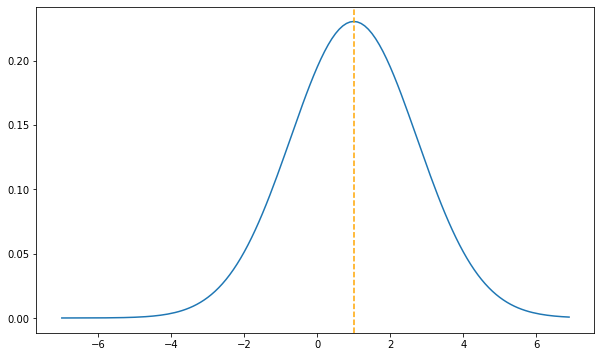

In [0]:
#@title Kendiniz Deneyin! { display-mode: "both" }

fig, axg= plt.subplots(figsize=(10,6), sharex = True, sharey = True)

xp = np.arange(-7,7,0.1)
mu = 1 #@param {type: "slider", min: -10, max: 10}
sigma_kare = 3 #@param {type: "slider", min: 0, max: 10}
axg.plot(xp,gaussian(xp, mu, sigma_kare))

axg.axvline(x=mu, color='orange',linestyle='--');




Bu çalışmada örnek olarak kullanacağımız veride sunucu olarak kullanılan bilgisayarlarının bir takım niteliklerinden yola çıkarak diğerlerinden farklı davranan sunucuları belirlemeye ve öylece hatalı çalışan sunucuları bulmaya çalışacağız.

Görsel sağlamak açısından iki nitelikten faydalanarak yaptığımız anomali tespitini daha sonra 11 nitelikten  faydalanarak oluşturulan daha büyük bir veri setinde deneyeceğiz. 
 

$ \{ x^{(1)}, x^{(2)}, ... ,  x^{(m)}\}$  şeklinde verilen  $m$ örneğe sahip *etiketlenmemiş* bir çalıştırma seti  alalım. Burada her $x^{(i)}$  örneği $\left[ x^{(i)}_1, x^{(i)}_2,  ..., x^{(i)}_n\right]$   n tane nitelikten oluşur. Öyle ki veri kümemizi $m \times n$'lik bir matris olarak hayal edebiliriz:


Kullandığımız veride , $m$ = 307, $n$=2 olup 
 
   $x_1=$ Tepki Süresi (ms) 

   $x_2=$ Veri Akış Hızı (mb/s)

olarak verilmektedir.







Biz örneklerimizde görsellik ve kolaylık açısından  "Pandas DataFrame" kullanacağız, fakat kodlarımız "NumPy array" için de çalışacak şekilde (bazı durumlarda opsiyonlu olarak) hazırlanmıştır.

In [0]:
# Örnek 1 (2D)

veri2D = pd.read_csv("/content/drive/My Drive/Makine_Öğrenmesi_Günü/data/AnomaliData/ADex1.csv", names=['tepki_suresi', 'akis_hizi'])
veri2D.tail(6)

,tepki_suresi,akis_hizi
301,21.727134,4.126232
302,12.476629,14.459370
303,19.582573,10.411619
304,23.339868,16.298874
305,18.261188,17.978309
306,4.752613,24.350407


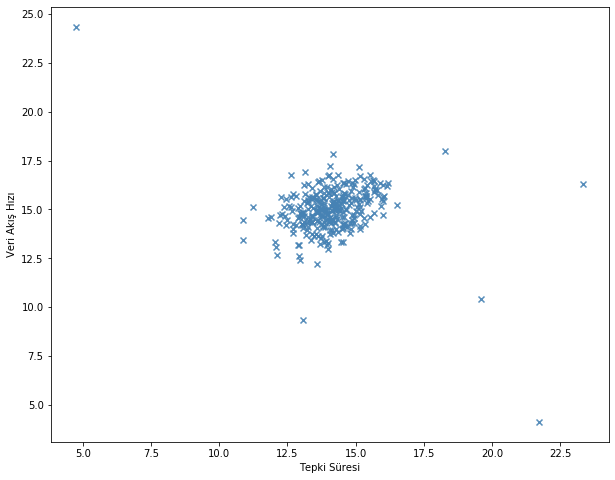

In [0]:
#@title Sunucuların Dağılımı
#@markdown Amacımız bu veride varolan ya da yeni eklenen bir sunucunun diğerlerine göre anormal davranıp davranmadığını belirlemek.
p_color = np.random.rand(307)
plt.figure(figsize=(10, 8)) 
plt.xlabel('Tepki Süresi')
plt.ylabel('Veri Akış Hızı')

plt.scatter( veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");


In [0]:
#@markdown Sırasıyla  "Tepki Süresi" ve "Veri Akış Hızı"  niteliklerinin ortalaması
# Her bir niteliğin ortalaması:
mu2D = param(veri2D)[0].round(3)
mu2D

tepki_suresi    14.112
akis_hizi       14.998
dtype: float64

In [0]:
#@markdown Sırasıyla  "Tepki Süresi" ve "Veri Akış Hızı"  niteliklerinin varyansları
# Her bir niteliğin varyansı
sigma2D = param(veri2D)[1].round(3)
sigma2D

tepki_suresi    1.833
akis_hizi       1.710
dtype: float64

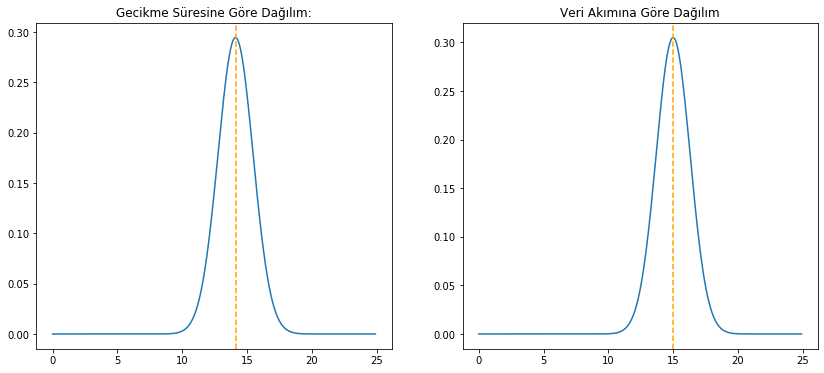

In [0]:
#@title Her bir nitelik için Gauss dağılımı
# Her bir nitelik için Gauss dağılımı

fig, (ax1, ax2)= plt.subplots(1,2,figsize=(14,6))

xp = np.arange(0,25,0.1)

ax1.plot(xp,gaussian(xp, mu2D[0], sigma2D[0]))
ax1.axvline(x=mu2D[0], color='orange',linestyle='--')
ax1.set_title("Gecikme Süresine Göre Dağılım:")
ax2.plot(xp,gaussian(xp, mu2D[1], sigma2D[1]))
ax2.axvline(x=mu2D[1], color='orange',linestyle='--')
ax2.set_title("Veri Akımına Göre Dağılım");


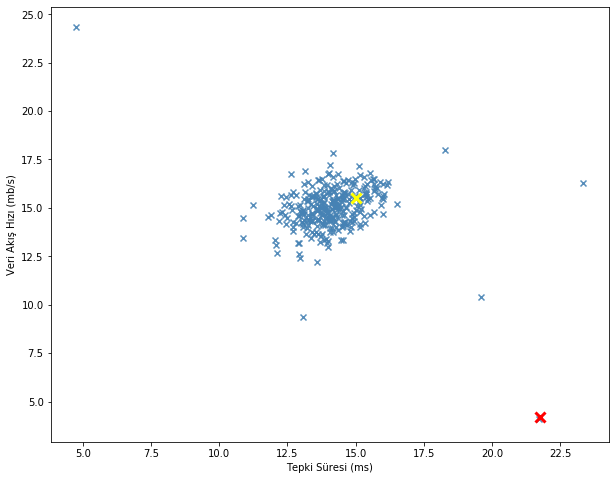

In [0]:
#@title Normal olma/anomali olmama olasılığı  
#@markdown  Burada kırmızı noktayı temsil eden sunucunun düzgün çalışan bir sunucu olma olasılığı sari noktaya göre daha düşüktür.

plt.figure(figsize=(10, 8)) 
plt.xlabel('Tepki Süresi (ms)')
plt.ylabel('Veri Akış Hızı (mb/s)')

plt.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");
plt.scatter(21.75,4.2, c= 'red', marker = r"x", s = 100, linewidth =3, label = 'anomali' )
plt.scatter(15,15.5, c= 'yellow', marker = r"x", s = 100,linewidth =3, label = 'normal nokta');

## Model: $p(x)$
 Her bir seviye eğrisi $p(x)$'in belli değerlerine karşılık gelir ve dışarı doğru gittikçe küçülür. Belirlediğimiz bir $\epsilon$ sayısına göre herhangi bir $ x $ verisi için


$$ \begin{cases} 
p(x) < \epsilon\quad \mbox{ise}\quad \mbox{x  anomali }\\
p(x) > \epsilon\quad \mbox{ise}\quad \mbox{x anomali değildir}
\end{cases}$$

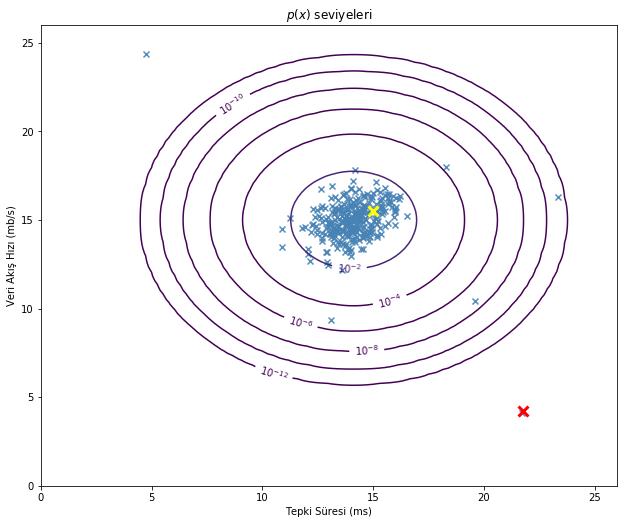

In [0]:
#@title 
fig = plt.figure(figsize=(10,8))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

x = np.linspace(0, 26, 100)
y = np.linspace(0, 26, 100)

X, Y = np.meshgrid(x, y)
Z = gaussian(X, mu2D[0], sigma2D[0]) * gaussian(Y, mu2D[1], sigma2D[1])


lev = np.array ([10**(-12), 10**(-10), 10**(-8), 10**(-6),10**(-4), 10**(-2),  0.1] )
# contourplot
CS = ax.contour(X, Y, Z,cmap='viridis', levels = lev)
# seviye etiketleri
fmt = {}
strs = ["$10^{-12}$", "$10^{-10}$", "$10^{-8}$", "$10^{-6}$","$10^{-4}$", "$10^{-2}$",  "$10^{-1}$" ]
for l, s in zip(CS.levels, strs):
    fmt[l] = s
ax.clabel(CS, inline=1, fontsize=10,  fmt=fmt )
ax.set_title('$p(x)$ seviyeleri')
p_color = np.random.rand(307)
ax.set_xlabel('Tepki Süresi (ms)')
ax.set_ylabel('Veri Akış Hızı (mb/s)')


ax.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");
ax.scatter(21.75,4.2, c= 'red', marker = r"x", s = 100, linewidth =3, label = 'anomali' )
ax.scatter(15,15.5, c= 'yellow', marker = r"x", s = 100,linewidth =3, label = 'normal nokta');

In [0]:
# Verilen bir epsilon değeri ve model için anomali tespiti

def anomali_bul(model, epsilon, veri_test):
  pveri = veri_test.apply(model, axis =1)
  #np.apply_along_axis(p_model2D, 1, veri2D) ## girdi numpy array ise
  anomali_nok = veri_test[(pveri < epsilon)]
  anomali_sayisi = anomali_nok.shape[0]
  print(veri_test.shape[0] , 'veriden', anomali_sayisi, 'tanesi anomalidir.' )
  return anomali_nok

Model fonksiyonu $p(x)$ "Normal Dağılım" tarafından belirlenir. Genel olarak,  $ \{ x^{(1)}, x^{(2)}, ... ,  x^{(m)}\}$  şeklinde verilen  $m$ örneğe sahip bir  eğitme verisi içinde  herhangi bir  *i* niteliğinin  için  $x_i=\{ x^{(1)}_i, x^{(2)}_i, ... ,  x^{(m)}_i\}$ ise 

$$\begin{align}\displaystyle \mu_i =&\frac{1}{m} \sum_{j=1}^m x^{(j)}_i\\ 
 \displaystyle \sigma^2_i =& \frac{1}{m} \sum_{j=1}^m (x^{(j)}_i - \mu_i)^2 \end{align}$$




Herhangi bir $x$ örneği ya da test verisi için

$$  \displaystyle p(x_i, mu, \sigma^2) =\frac{1}{\sqrt{2 \pi \sigma_i^2 }} \rm{e}^{-\frac{(x_i-\mu_i)^2}{2\sigma_i^2}} $$

olmak üzere

$$  p(x) = \prod_{i=1}^n p(x_i, mu, \sigma^2)$$

şeklinde hesaplanır.








Örneğimizde daha önce de belirttiğimiz üzere $m$ = 307, $n$=2 olup ortalama ve varyans değerlerini

| | $\mu$ | $\sigma^2$|
| --- | --- | --- |
| Tepki Süresi | 14.112 | 1.833 |
| Veri Akış Hızı | 14.998 | 1.710| 


olarak bulmuştuk.

In [0]:
# p(x)' in hesaplanmasi

def model(X):                                         # X = etiketsiz egitme verisi
  mu = param(X)[0]                                    #ortalama
  sigma2 = param(X)[1]                                #varyans
  p_x = lambda x: np.prod(gaussian(x, mu, sigma2))    # olasılık fonksiyonlarının çarpımı
  return p_x                                          # nitelik vektörü ile aynı boyutta vektör alan bir fonksiyon doner

In [0]:
# Örnek 1 için model fonksiyonu p(x)

p2D_x = model(veri2D)

Bu değerlere göre $p(x)$ fonksiyonunun grafiği soldaki şekildeki  görünür ve bahsettiğimiz seviye eğrileri sağ taraftaki eğrilerin gölgeleridir.

[]

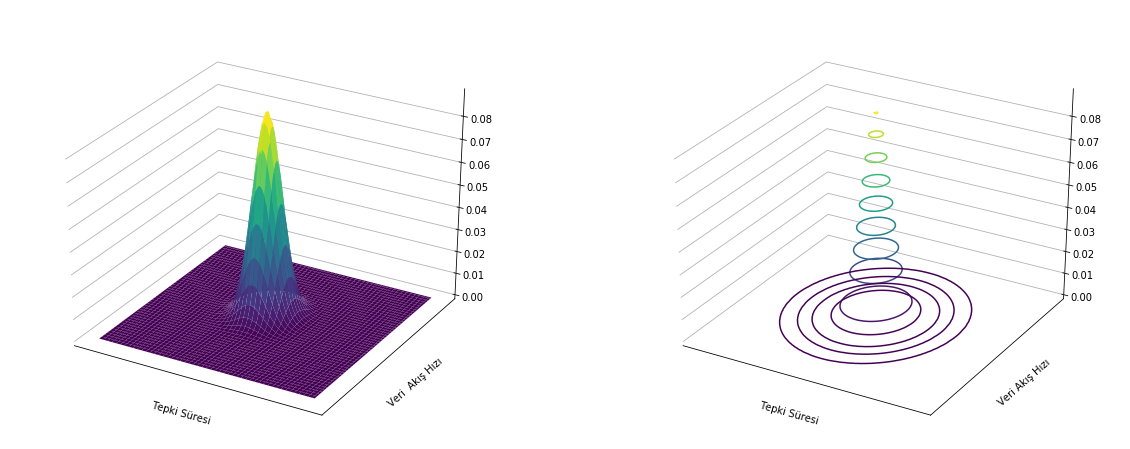

In [0]:
#@markdown 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8), subplot_kw=dict(projection='3d') )

x = np.linspace(3, 26, 100)
y = np.linspace(5, 24, 100)

X, Y = np.meshgrid(x, y)
Z = gaussian(X, mu2D[0], sigma2D[0])*gaussian(Y, mu2D[1], sigma2D[1])
# Normalize the colors based on Z value
norm = plt.Normalize(Z.min(), Z.max())
color_p = cm.jet(norm(Z))

lev2 = np.array([10**(-10), 10**(-7), 10**(-5), 10**(-3), 0.5*10**(-2), 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.089])
ax1.plot_surface(X, Y, Z, cmap = 'viridis');

ax1.set_xlabel('Tepki Süresi')
ax1.set_ylabel('Veri  Akış Hızı')
# Get rid of the panes
ax1.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# Get rid of the ticks
ax1.set_xticks([]) 
ax1.set_yticks([]) 

ax2.contour3D(X, Y, Z, levels = lev2, cmap = 'viridis' );
ax2.set_xlabel('Tepki Süresi')
ax2.set_ylabel('Veri Akış Hızı')
# Get rid of the panes and ticks
ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.set_xticks([]) 
ax2.set_yticks([])


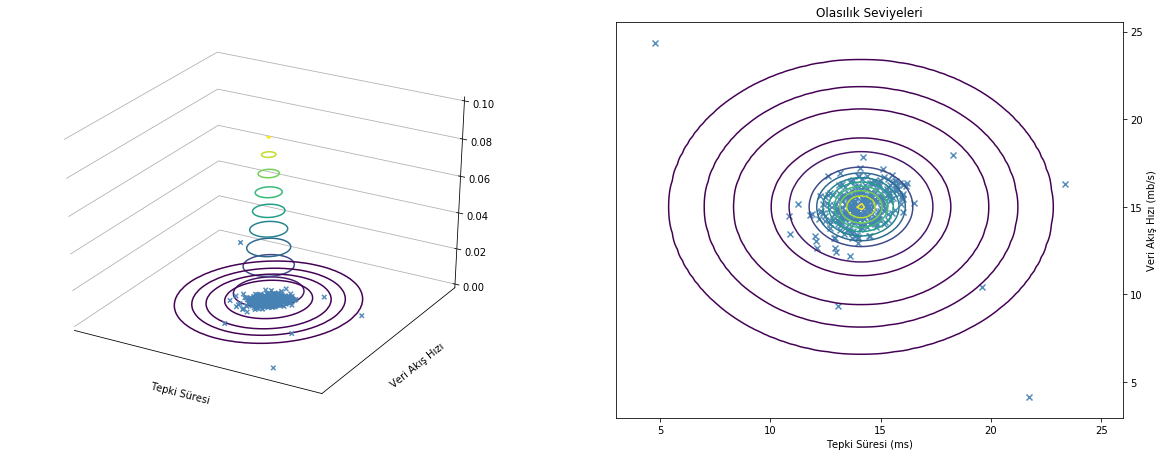

In [0]:
#@title p(x) seviyeleri 

from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(20,16))


# Second subplot
ax0 = fig.add_subplot(2, 2, 2)

x0 = np.linspace(0, 26, 100)
y0 = np.linspace(0, 24, 100)

X0, Y0 = np.meshgrid(x, y)
Z0 = gaussian(X0, mu2D[0], sigma2D[0]) * gaussian(Y0, mu2D[1], sigma2D[1])

# contourplot
ax0.contour(X0, Y0, Z0, cmap='viridis', levels = lev2)

#ax.clabel(CS, inline=1, fontsize=10)
ax0.set_title('Olasılık Seviyeleri')
p_color = np.random.rand(307)
ax0.set_xlabel('Tepki Süresi (ms)')
ax0.set_ylabel('Veri Akış Hızı (mb/s)')
ax0.yaxis.tick_right()          # moves plot ticks to right
ax0.yaxis.set_label_position("right")   # moves label to right

ax0.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");

# First subplot
ax2 = fig.add_subplot(2, 2, 1, projection='3d')

ax2.contour3D(X, Y, Z, levels = lev2, cmap = 'viridis' );
ax2.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], 0, c= 'steelblue', alpha=0.9, marker = r"x");
ax2.set_xlabel('Tepki Süresi')
ax2.set_ylabel('Veri Akış Hızı')
# Get rid of the panes and ticks
ax2.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.set_xticks([]) 
ax2.set_yticks([])
ax2.set_zlim(0, 0.1)
plt.show()

## Eşik Değeri ($\epsilon$) Seçimi:

Eşik değeri seçimi biraz subjektif bir meseledir. Probleme göre farklılık gösterebilir. Biz burada daha önceki tecrübelere dayanarak anomali olarak etiketlenmiş veriden faydalanarak eşik değerini belirlemeye çalışacağız.

Biz örneğimizde etiketlenmiş bir doğrulama kümesinden yararlanacağız. Daha önce düzgün çalışmayan sunucuların  davranışlarından yola çıkarak hazırlanmış bu veri kümesi sayesinde anomalileri belirlemeye çalışacağız.

In [0]:
# Doğrulama kümesi(Validation set)

veri2D_dv = pd.read_csv("/content/drive/My Drive/Makine_Öğrenmesi_Günü/data/AnomaliData/ADex1_val.csv", names=['tepki_suresi', 'akis_hizi', "anomali"])
veri2D_dv.head(4)

,tepki_suresi,akis_hizi,anomali
0,15.790260,14.921024,0
1,13.639619,15.329955,0
2,14.865899,16.473865,0
3,13.584676,13.989306,0


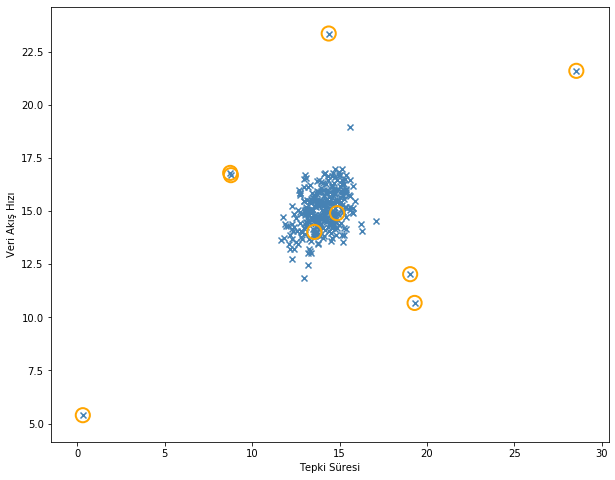

In [0]:
#@title Doğrulama kümesi
#@markdown Daha önceki gözlemlere dayanarak  sunucular arasında düzgün çalışmadığı belirlenen sunucular grafikte anomali olarak işaretlenmiştir.

plt.figure(figsize=(10, 8)) 
plt.xlabel('Tepki Süresi')
plt.ylabel('Veri Akış Hızı')

plt.scatter(veri2D_dv['tepki_suresi'], veri2D_dv['akis_hizi'], c= 'steelblue',  marker = r"x");
plt.scatter(veri2D_dv[veri2D_dv.anomali == 1].tepki_suresi, veri2D_dv[veri2D_dv.anomali == 1].akis_hizi, edgecolors= 'orange', marker = r'o', s=200, linewidth =2, facecolors= 'none');



In [0]:
veri2D_dv[veri2D_dv.anomali == 1].count()[2]

9

Doğrulama kümemizde toplamda 9 anomali bulunmaktadır.

### F1 değerlendirme  ölçütü
Eşik değerini ne kadar iyi seçtiğimizi belirlerken kesinlik ve hassasiyet arasında iyi bir denge kuran F1 değerlendirme ölçütünü (F1-skoru) kullanacağız.








In [0]:
# F1 skoru hesaplama

def F1(tahmin, y):                                         # Tahmin ve y için  0 ve 1 sayilarindan olusan bir vektor ya da dataframe olarak giriniz.

  dp = len(np.where( (y == 1)  & (tahmin == 1) )[0])       # dogru pozitif 
  yp = len(np.where( (y == 0)  & (tahmin == 1) )[0])       # yanlis pozitif 
  yn = len(np.where( (y == 1)  & (tahmin == 0) )[0])       # yanlis negatif 
    
  prec = dp/(dp + yp);           # kesinlik
  rec =  dp/(dp + yn);           # hassasiyet
  F1 = 2*(prec*rec)/(prec+rec);  # F1 skoru
  return F1

##Eşik Değeri Seçmek için bir  Algoritma 



1. Modeli  kullanarak doğrulama kümesindeki her x noktası için $p(x)$'i belirle.
2. $min\ p(x)$ ve $max\ p(x)$ arasındaki değerler arasından seçilen her   $\epsilon$ için
$$ \begin{cases} 
p(x) < \epsilon\quad \mbox{ise}\quad \mbox{x  anomali }\\
p(x) > \epsilon\quad \mbox{ise}\quad \mbox{x anomali değil }
\end{cases}$$
olarak işaretleyerek bir tahmin vektörü oluştur.
3. Tahmin ve doğrulama kümesinde verilen gerçek değerleri karşılaştırıp F1 skoru bul.
4. Denenilen $\epsilon$'lardan F1-skoru en büyük olan $\epsilon$'u  seç.







In [0]:
# Verilen model ve doğrulama verisine göre epsilon secer:

def epsilon_sec(model, x_dv, y_dv):
  # Dogrulama kumesindeki her x icin p(x) hesaplanir
  p_dv = np.apply_along_axis(model, 1, x_dv) ## numpy array için
  tahmin = p_dv
  bestF1 =0 

  for epsilon in np.linspace(p_dv.min(),p_dv.max(), 1000):
    # anomali tahmini
    tahmin[np.where(p_dv > epsilon)] = 0      
    tahmin[np.where(p_dv < epsilon)] = 1
    F1_dv = F1(tahmin, y_dv)
    # en iyi epsilonu secme
    if F1_dv > bestF1:               
      bestF1 = F1_dv
      bestEpsilon = epsilon
  return bestEpsilon

İncelediğimiz örnekte modelimizi 


```
p2D_x = model(veri2D)
```
ve doğrulama veri kümesinin olarak seçtiğimizi hatırlayalım. Bu durumda en iyi epsilon değeri aşağıdaki gibi verilecektir: 


In [0]:
epsilon2D= epsilon_sec(p2D_x, veri2D_dv[['tepki_suresi', 'akis_hizi']], veri2D_dv['anomali'])
epsilon2D

8.999852631901394e-05

In [0]:
den= veri2D.apply(p2D_x, axis = 1)
veri2D[(den > 0.05)]
veri2D.shape

(307, 2)

Anomali bulma fonksiyonumuzu daha önce şu şekilde oluşturmuştuk:


```
# Verilen bir epsilon değeri ve model için anomali tespiti
def anomali_bul(model, epsilon, veri_test):
  pveri = veri_test.apply(model, axis =1)
  #np.apply_along_axis(p_model2D, 1, veri2D) ## girdi numpy array ise
  anomali_nok = veri_test[(pveri < epsilon)]
  anomali_sayisi = anomali_nok.shape[0]
  print(veri_test.shape[0] , 'veriden', anomali_sayisi, 'tanesi anomalidir.' )
  return anomali_nok
```



In [0]:
anomali2D= anomali_bul(p2D_x, epsilon2D, veri2D)
anomali2D

307 veriden 6 tanesi anomalidir.


,tepki_suresi,akis_hizi
300,13.079310,9.347878
301,21.727134,4.126232
303,19.582573,10.411619
304,23.339868,16.298874
305,18.261188,17.978309
306,4.752613,24.350407


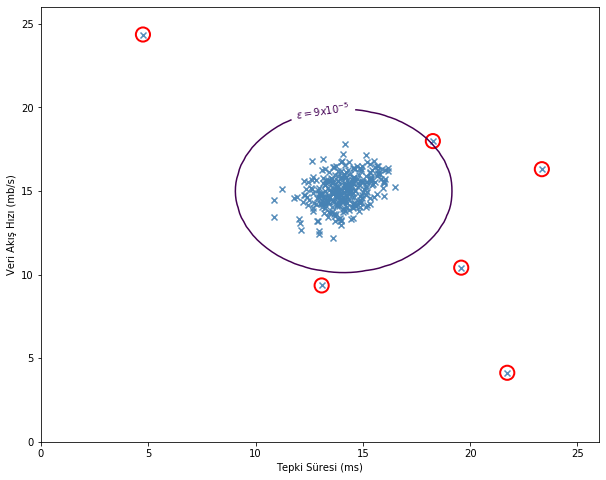

In [0]:
#@title Anomalilerin İşaretlenmesi
#@markdown  

plt.figure(figsize=(10, 8)) 
plt.xlabel('Tepki Süresi (ms)')
plt.ylabel('Veri Akış Hızı (mb/s)')

plt.scatter(veri2D['tepki_suresi'], veri2D['akis_hizi'], c= 'steelblue', alpha=0.9, marker = r"x");
plt.scatter(anomali2D['tepki_suresi'],anomali2D['akis_hizi'], edgecolors= 'red', marker = r'o', s=200, linewidth =2, facecolors= 'none' );
x = np.linspace(0, 26, 100)
y = np.linspace(0, 26, 100)

X, Y = np.meshgrid(x, y)
Z = gaussian(X, mu2D[0], sigma2D[0]) * gaussian(Y, mu2D[1], sigma2D[1])
# contourplot
C= plt.contour(X, Y, Z,cmap='viridis', levels = [epsilon2D])

plt.clabel(C, inline=1, fmt ="$\epsilon = 9x10^{-5}$" ,fontsize=10);

Özetle anomali tespitini yaparken 

1. Verinin dağılıma göre $p(x)$'i belirleriz.
  
2. Etiketli bir veri kullanarak ya da subjektif olarak  eşik değeri seçeriz.

3. Eşik değerini kullanarak anomalileri belirleriz.



Şimdiye kadar 2 niteliğe sahip bir örnek üzerinde çalıştık. Kurduğumuz algoritma ve oluşturduğumuz fonksiyonlar herhangi bir nitelik sayısı için de geçerli olacaktır. O yüzden şimdi algoritmanın nasıl çalıştığını özetlemek adına sunucuların diğer özelliklerini de göz önüne alarak oluşturulan daha çok nitelikli ve daha gerçekci bir veri kümesi alalım ve burdaki anomalileri tespit etmeye çalışalım. 

In [0]:
# Örnek 2 (11D): Örnek verinin okunması
## Sütun isimleri
colnames = [] 
for i in range(1,12):
  colnames.append("Nitelik " + str(i))
veri11D = pd.read_csv("/content/drive/My Drive/Makine_Öğrenmesi_Günü/data/AnomaliData/ADex2.csv", names= colnames)
veri11D.sample(4)

,Nitelik 1,Nitelik 2,Nitelik 3,Nitelik 4,Nitelik 5,Nitelik 6,Nitelik 7,Nitelik 8,Nitelik 9,Nitelik 10,Nitelik 11
870,7.663754,-21.315959,10.085647,-13.476459,1.869769,31.556190,-4.207739,6.783527,-9.069698,25.711498,4.205376
792,10.107491,-9.080958,14.171571,-16.793308,-0.208235,16.474125,-10.561193,3.181788,-10.044201,-3.356552,12.951254
601,9.260034,-13.733095,12.157708,-14.850167,2.281082,29.461892,-14.682457,-2.414349,-3.665467,12.489695,10.198591
527,28.384866,-10.272329,6.588649,3.712807,-5.350785,-0.872133,2.456451,24.732877,-9.640292,8.061109,12.638663




> (1) Verilen 11 nitelikli veriyi alarak ortalama ve varyans değerlerini hesaplayıp bunlara  karşılık gelen p(x) fonksiyonunu bulan fonksiyonumuzu çalıştırıyoruz :  



In [0]:
# Model p(x) fonksiyonunun bulunması

p11D_x = model(veri11D)


(2) Doğrulama verisetini kullanarak eşik değerini hesaplıyoruz. 

In [0]:
# Doğrulama veriseti (Validation set)

colnames_dv = colnames +['Anomali' ]          #y sütunu için isimlendirme
veri2D_dv = pd.read_csv("/content/drive/My Drive/Makine_Öğrenmesi_Günü/data/AnomaliData/ADex2_val.csv", names= colnames_dv)
veri2D_dv.head(4)

,Nitelik 1,Nitelik 2,Nitelik 3,Nitelik 4,Nitelik 5,Nitelik 6,Nitelik 7,Nitelik 8,Nitelik 9,Nitelik 10,Nitelik 11,Anomali
0,18.271283,-12.359268,5.000970,1.611472,1.088592,29.314410,-8.313531,36.438338,-9.476679,-25.928183,7.108628,1
1,-3.193070,-19.705821,6.528556,-21.570858,3.050556,23.477503,-1.133420,12.688409,-10.968301,-1.198666,1.908441,0
2,-5.256678,-12.918720,25.435141,-7.231568,3.647838,12.366550,-6.512076,8.750902,-0.768755,-3.261094,13.729474,0
3,12.953176,-10.350333,19.857858,-24.424608,3.266105,30.445294,-11.125842,12.815629,9.351355,-6.113624,17.627375,1


In [0]:
x11D_dv = veri2D_dv.iloc[:, :11]                             # 11 nitelik vektorundan olusan df
y11D_dv = veri2D_dv.iloc[:, 11]                              # gercek deger vektoru
epsilon11D=  epsilon_sec(p11D_x, x11D_dv, y11D_dv)           # esik degeri
print('Eşik değeri', '{:.3E}'.format(epsilon11D), 'olarak bulunmuştur.')

Eşik değeri 1.379E-18 olarak bulunmuştur.


> (3) Örnek veriseti içinde eşik değerinin dışında kalan noktaları anomali olarak listeliyoruz:

In [0]:
anomali11D = anomali_bul(p11D_x, epsilon11D, veri11D)
anomali11D

1000 veriden 117 tanesi anomalidir.


,Nitelik 1,Nitelik 2,Nitelik 3,Nitelik 4,Nitelik 5,Nitelik 6,Nitelik 7,Nitelik 8,Nitelik 9,Nitelik 10,Nitelik 11
9,15.107877,-16.430766,19.707360,-19.811888,-1.644537,-6.444184,-6.121214,7.042283,7.232476,17.223479,-2.956852
20,12.411706,3.150959,14.827734,-10.482672,-8.250082,-7.982698,-20.766918,30.689476,4.622547,12.234751,23.167294
21,20.946754,1.048170,8.296324,-2.595042,-14.061970,8.776611,-21.886068,9.769264,-20.071130,13.871906,4.197881
30,5.127033,-18.517137,11.422480,-28.993408,-5.797960,-15.989215,-12.039753,31.296681,8.203208,8.035668,19.519680
39,11.622006,-0.229723,10.005823,-9.700729,-14.765493,26.933578,-9.299882,13.109171,8.976218,8.157170,18.663064
...,...,...,...,...,...,...,...,...,...,...,...
952,-7.514689,-11.633082,12.714199,-9.659930,-20.170026,46.574569,-10.498804,20.522685,-1.223742,4.478910,-0.186369
970,8.610956,-2.087595,13.609762,-5.509457,4.565548,-2.150133,6.652794,6.604923,-0.554557,-21.551409,5.522046
975,4.712890,-5.468014,7.463785,15.156009,-4.815854,-10.092629,3.830391,-0.360002,-11.221351,-3.262486,1.591322
992,-12.120077,-5.845913,28.951978,-10.215184,-18.070297,15.439734,-4.961338,31.429439,-7.406423,5.847000,20.797016
